
Parcela: Parcela 1
Año: 2023
       Temp. grano(°C)    Humedad(%)  (seco)Masa de rend.(tonne/ha)
count     11187.000000  11187.000000                   11187.000000
mean         29.574403     16.990396                       4.719743
std           2.879196      3.635351                       1.951138
min          25.450000      5.040000                       1.594000
25%          27.350000     14.110000                       3.384000
50%          28.850000     17.540000                       4.208000
75%          30.350000     19.500000                       5.500000
max          35.650000     33.100000                      15.180000
Año: 2024
       Temp. grano(°C)   Humedad(%)  (seco)Masa de rend.(tonne/ha)
count      3268.000000  3268.000000                    3268.000000
mean         27.921328    15.932645                       8.263334
std           2.933616     1.942417                       3.545636
min          21.550000     9.490000                       0.373000
25%          

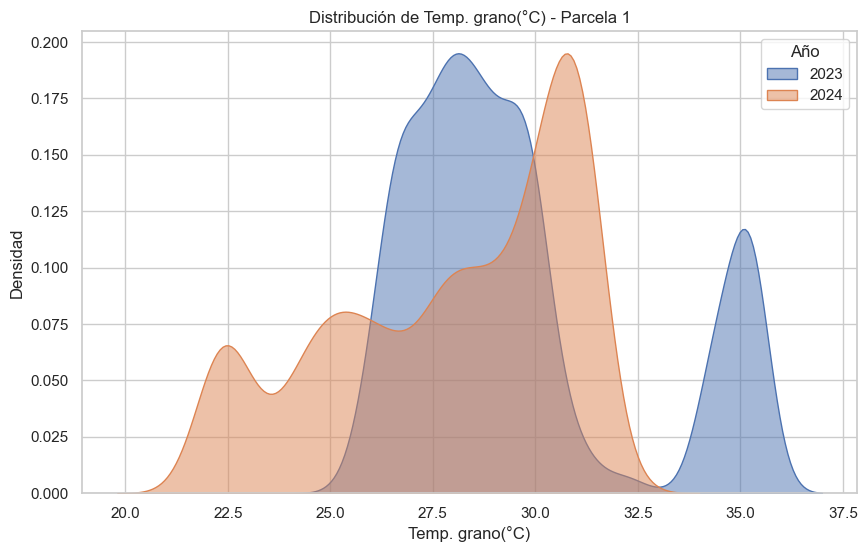

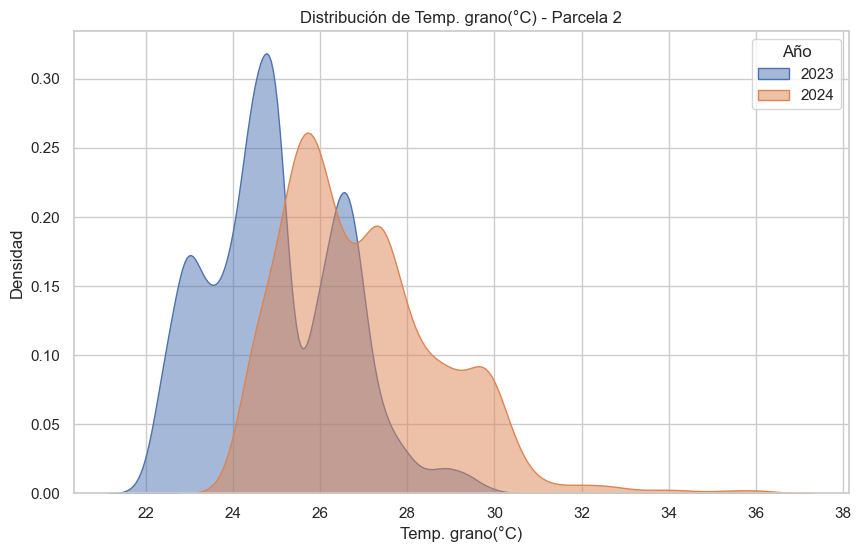

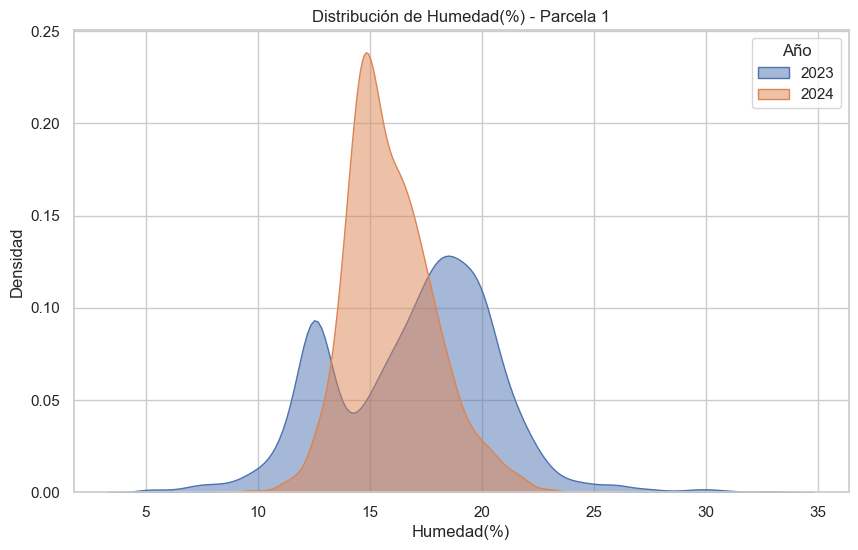

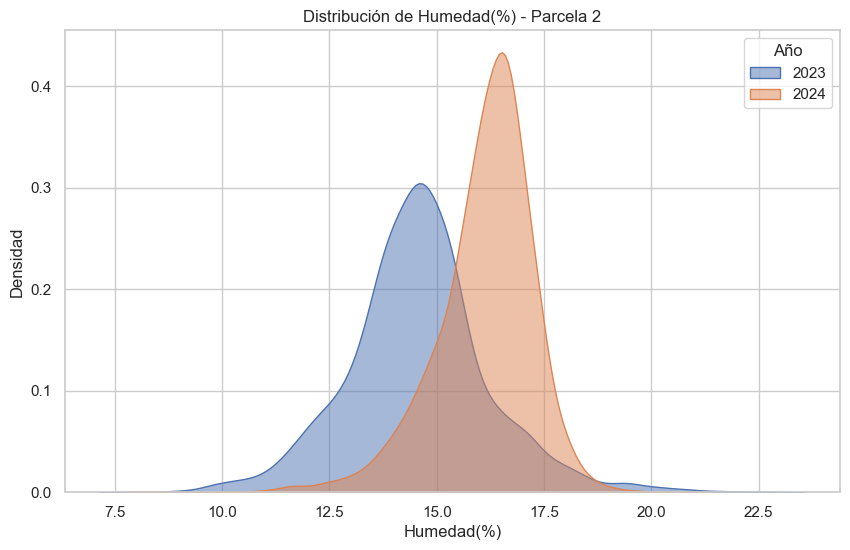

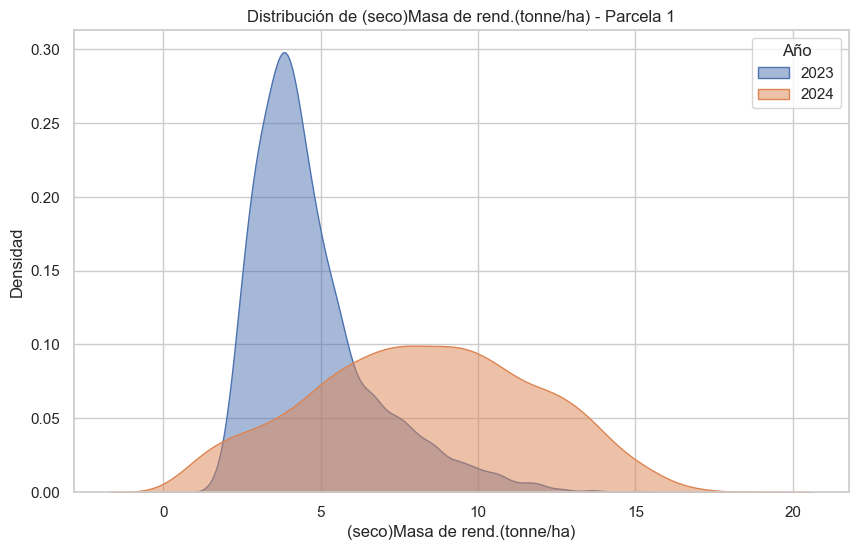

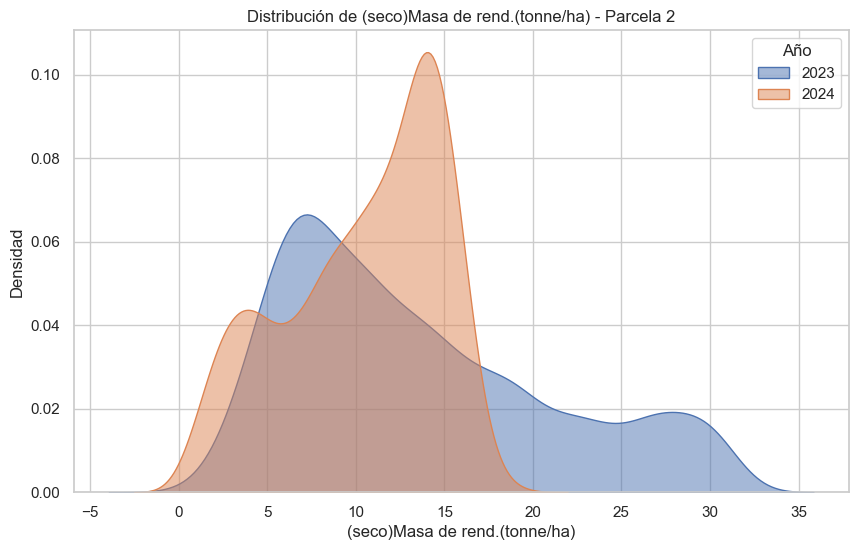

In [15]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de archivos
archivos = [
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 1\1. Cosecha 2023.csv",
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 1\4. Cosecha 2024.csv",
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 2\1. Cosecha 2023.csv",
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 2\4. Cosecha 2024.csv"
]

df_list = []

for archivo in archivos:
    df_temp = pd.read_csv(archivo, encoding='latin-1')
    parcela = os.path.basename(os.path.dirname(archivo))
    df_temp['Parcela'] = parcela
    df_list.append(df_temp)

df = pd.concat(df_list, ignore_index=True)

# Convertir fecha y extraer año
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df['Año'] = df['Fecha'].dt.year

# Variables de interés
variables = ["Temp. grano(°C)", "Humedad(%)", "(seco)Masa de rend.(tonne/ha)"]

parcelas = df['Parcela'].unique()
años = df['Año'].unique()

# -------------------------
# Estadísticas descriptivas
# -------------------------
resultados = {}
for parcela in parcelas:
    resultados[parcela] = {}
    for año in años:
        datos = df[(df['Parcela'] == parcela) & (df['Año'] == año)][variables]
        if not datos.empty:
            resultados[parcela][año] = datos.describe()
        else:
            resultados[parcela][año] = None

# Mostrar resultados
for parcela, años_stats in resultados.items():
    print(f"\nParcela: {parcela}")
    for año, stats in años_stats.items():
        print(f"Año: {año}")
        if stats is not None:
            print(stats)
        else:
            print("No hay datos")

# -------------------------
# Graficar distribuciones
# -------------------------
sns.set(style="whitegrid")
for var in variables:
    for parcela in parcelas:
        plt.figure(figsize=(10,6))
        for año in años:
            datos = df[(df['Parcela'] == parcela) & (df['Año'] == año)][var]
            if not datos.empty:
                sns.kdeplot(datos, fill=True, label=str(año), alpha=0.5)
        plt.title(f'Distribución de {var} - {parcela}')
        plt.xlabel(var)
        plt.ylabel("Densidad")
        plt.legend(title="Año")
        plt.show()


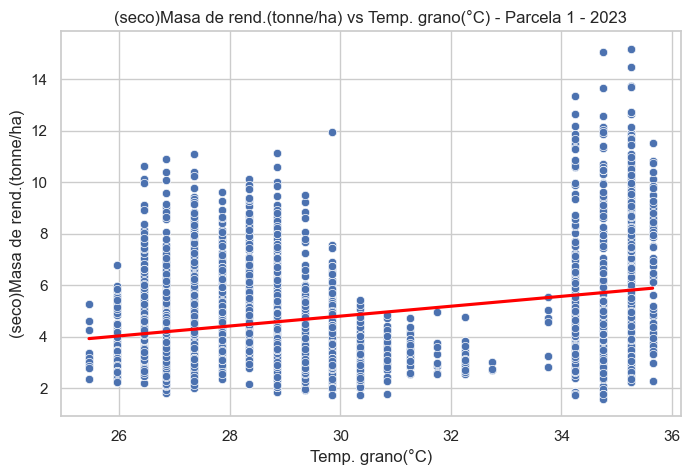

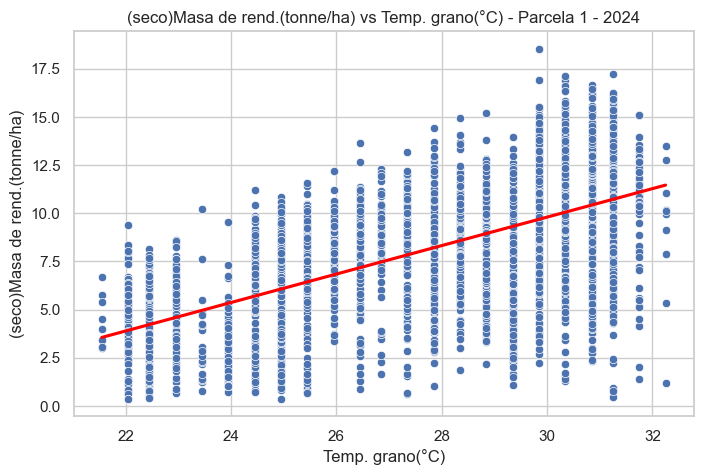

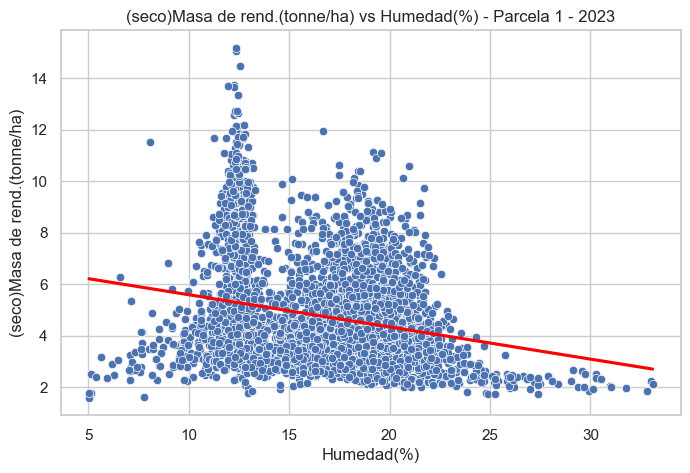

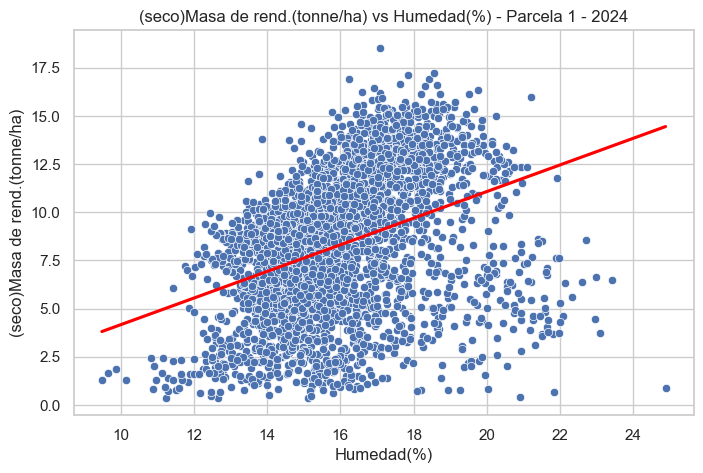

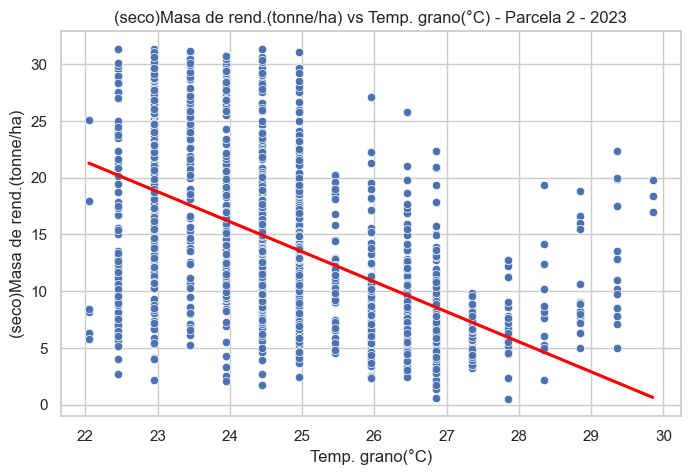

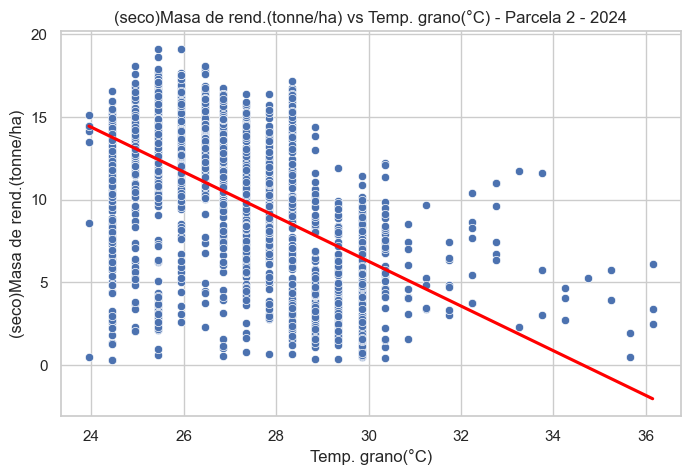

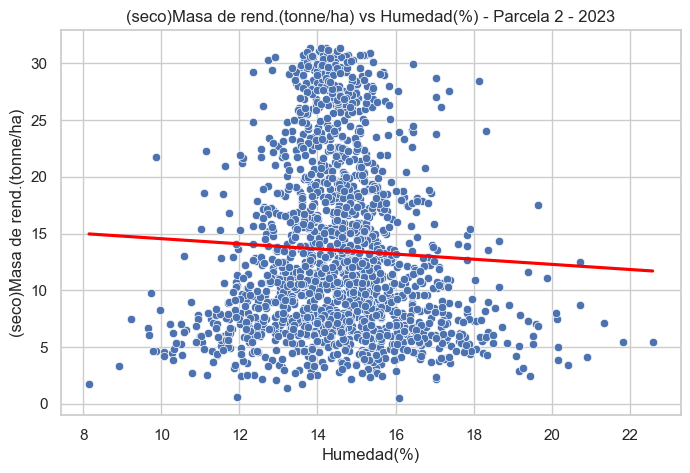

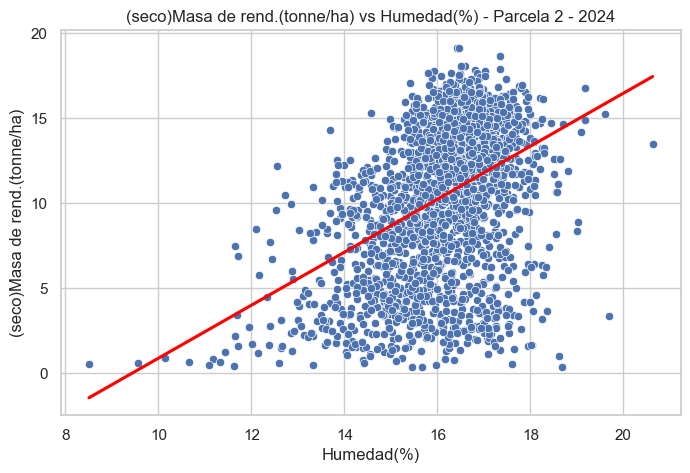

In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de archivos
archivos = [
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 1\1. Cosecha 2023.csv",
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 1\4. Cosecha 2024.csv",
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 2\1. Cosecha 2023.csv",
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 2\4. Cosecha 2024.csv"
]

df_list = []

for archivo in archivos:
    df_temp = pd.read_csv(archivo, encoding='latin-1')
    parcela = os.path.basename(os.path.dirname(archivo))
    df_temp['Parcela'] = parcela
    df_list.append(df_temp)

df = pd.concat(df_list, ignore_index=True)

# Convertir fecha y extraer año
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df['Año'] = df['Fecha'].dt.year

# Variables y target
variables = ["Temp. grano(°C)", "Humedad(%)"]
target = "(seco)Masa de rend.(tonne/ha)"

sns.set(style="whitegrid")

# Graficar por parcela, variable y año
for parcela in df['Parcela'].unique():
    for var in variables:
        for año in df['Año'].unique():
            datos = df[(df['Parcela'] == parcela) & (df['Año'] == año)]
            if not datos.empty:
                plt.figure(figsize=(8,5))
                sns.scatterplot(x=var, y=target, data=datos)
                sns.regplot(x=var, y=target, data=datos, scatter=False, ci=None, color='red')
                plt.title(f'{target} vs {var} - {parcela} - {año}')
                plt.xlabel(var)
                plt.ylabel(target)
                plt.show()


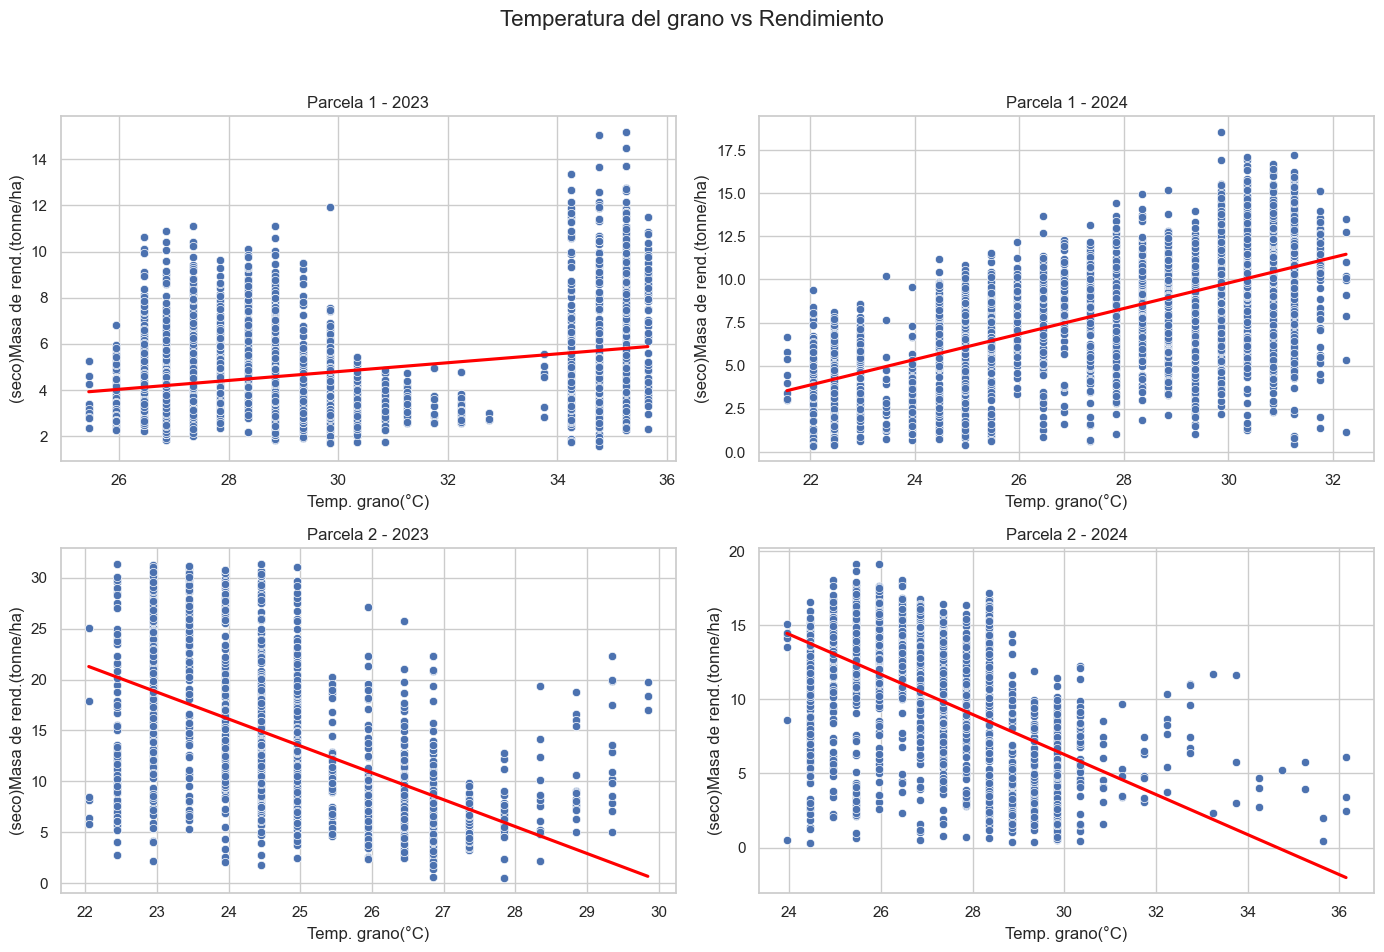

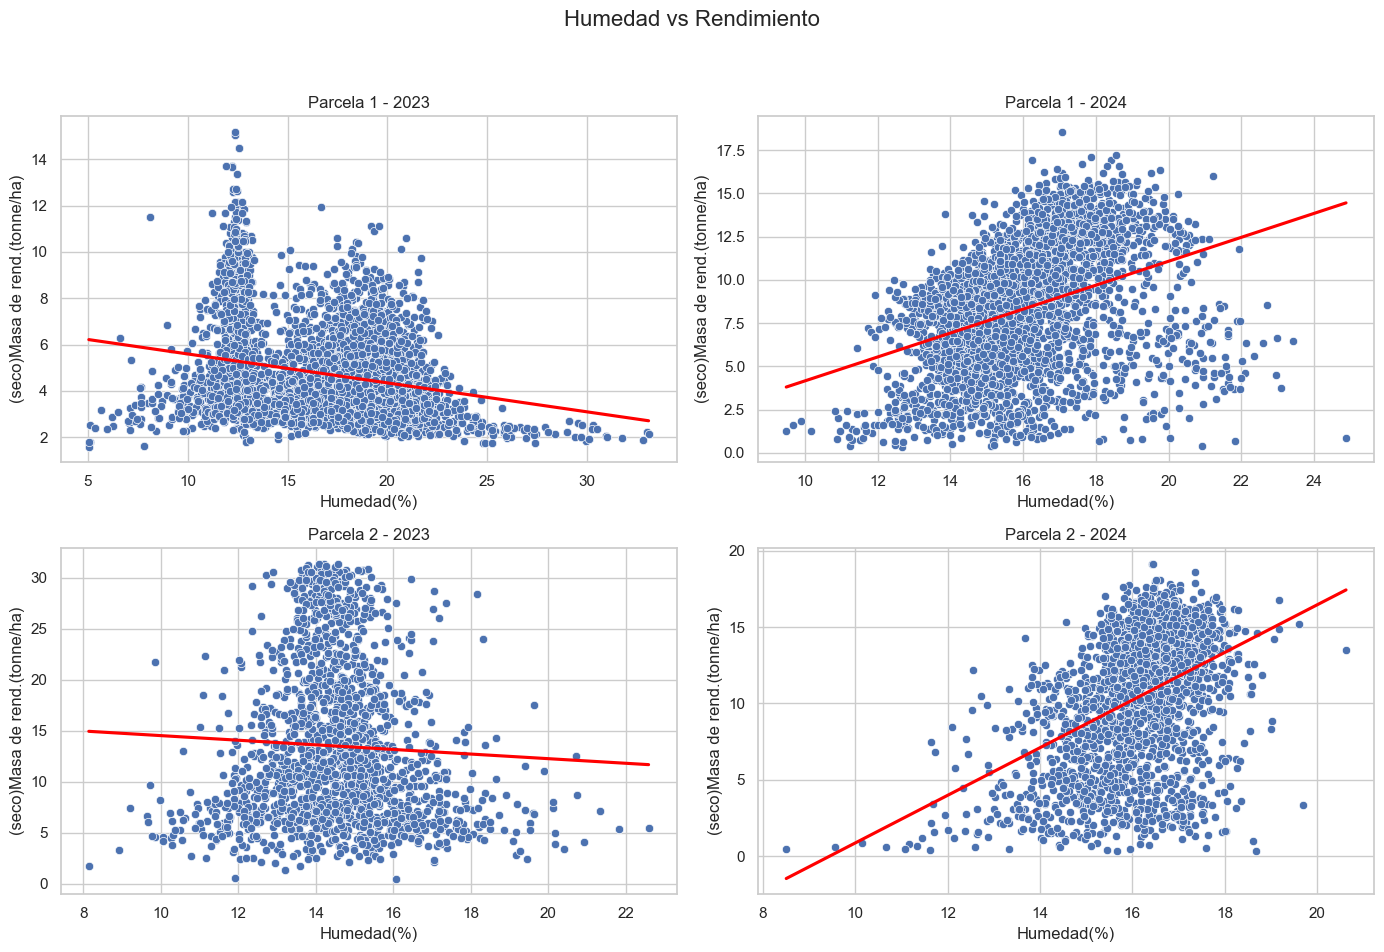

In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de archivos
archivos = [
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 1\1. Cosecha 2023.csv",
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 1\4. Cosecha 2024.csv",
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 2\1. Cosecha 2023.csv",
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 2\4. Cosecha 2024.csv"
]

df_list = []

for archivo in archivos:
    df_temp = pd.read_csv(archivo, encoding='latin-1')
    parcela = os.path.basename(os.path.dirname(archivo))
    df_temp['Parcela'] = parcela
    df_list.append(df_temp)

df = pd.concat(df_list, ignore_index=True)

# Convertir fecha y extraer año
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df['Año'] = df['Fecha'].dt.year

target = "(seco)Masa de rend.(tonne/ha)"
sns.set(style="whitegrid")

# Función para crear figura de 4 subplots por variable
def graficar_variable(var, titulo):
    fig, axes = plt.subplots(2, 2, figsize=(14,10))
    fig.suptitle(titulo, fontsize=16)

    combinaciones = [
        ("Parcela 1", 2023),
        ("Parcela 1", 2024),
        ("Parcela 2", 2023),
        ("Parcela 2", 2024)
    ]

    for idx, (parcela, año) in enumerate(combinaciones):
        ax = axes[idx//2, idx%2]
        datos = df[(df['Parcela'] == parcela) & (df['Año'] == año)]
        sns.scatterplot(x=var, y=target, data=datos, ax=ax)
        sns.regplot(x=var, y=target, data=datos, scatter=False, ci=None, ax=ax, color='red')
        ax.set_title(f'{parcela} - {año}')
        ax.set_xlabel(var)
        ax.set_ylabel(target)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Crear figura de Temperatura
graficar_variable("Temp. grano(°C)", "Temperatura del grano vs Rendimiento")

# Crear figura de Humedad
graficar_variable("Humedad(%)", "Humedad vs Rendimiento")


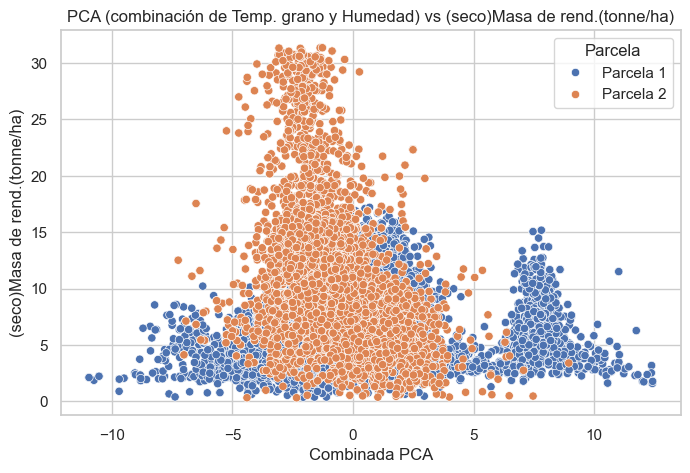

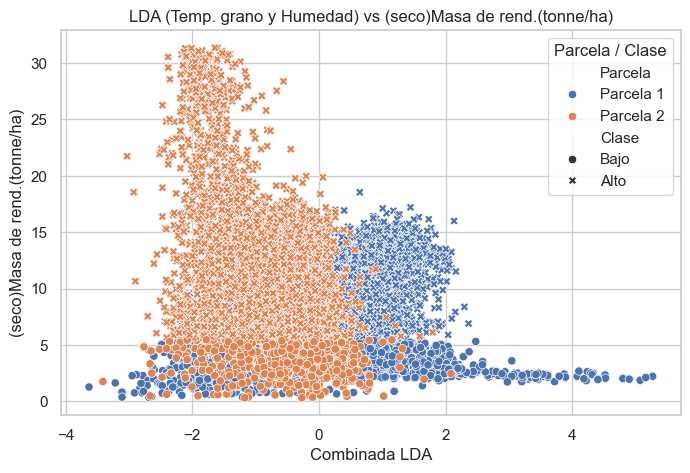

In [12]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Archivos
archivos = [
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 1\1. Cosecha 2023.csv",
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 1\4. Cosecha 2024.csv",
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 2\1. Cosecha 2023.csv",
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 2\4. Cosecha 2024.csv"
]

df_list = []

for archivo in archivos:
    df_temp = pd.read_csv(archivo, encoding='latin-1')
    parcela = os.path.basename(os.path.dirname(archivo))
    df_temp['Parcela'] = parcela
    df_list.append(df_temp)

df = pd.concat(df_list, ignore_index=True)

# Convertir fecha y extraer año
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df['Año'] = df['Fecha'].dt.year

# Variables y target
variables = ["Temp. grano(°C)", "Humedad(%)"]
target = "(seco)Masa de rend.(tonne/ha)"

# ----------------------------
# PCA
# ----------------------------
X = df[variables].values
pca = PCA(n_components=1)
df['Combinada_PCA'] = pca.fit_transform(X)

# Graficar PCA vs target
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.scatterplot(x='Combinada_PCA', y=target, hue='Parcela', data=df)
plt.title(f'PCA (combinación de Temp. grano y Humedad) vs {target}')
plt.xlabel('Combinada PCA')
plt.ylabel(target)
plt.legend(title='Parcela')
plt.show()

# ----------------------------
# LDA
# ----------------------------
# Crear clases: dividimos rendimiento en Bajo y Alto usando percentiles
df['Clase'] = pd.qcut(df[target], q=2, labels=["Bajo", "Alto"])

X = df[variables].values
y = df['Clase'].values

lda = LDA(n_components=1)
df['Combinada_LDA'] = lda.fit_transform(X, y)

# Graficar LDA vs target
plt.figure(figsize=(8,5))
sns.scatterplot(x='Combinada_LDA', y=target, hue='Parcela', style='Clase', data=df)
plt.title(f'LDA (Temp. grano y Humedad) vs {target}')
plt.xlabel('Combinada LDA')
plt.ylabel(target)
plt.legend(title='Parcela / Clase')
plt.show()


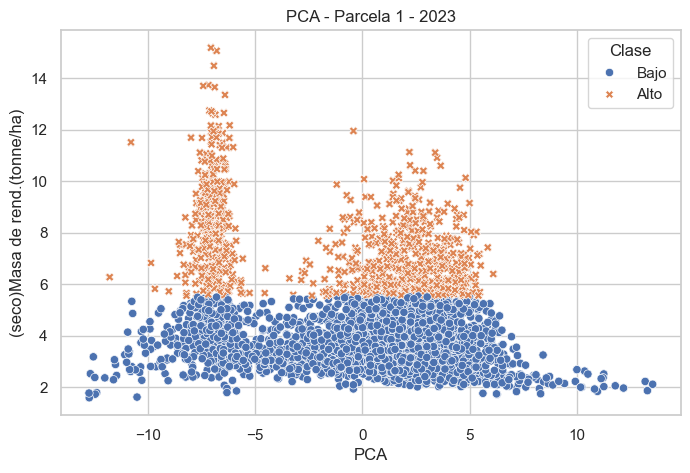

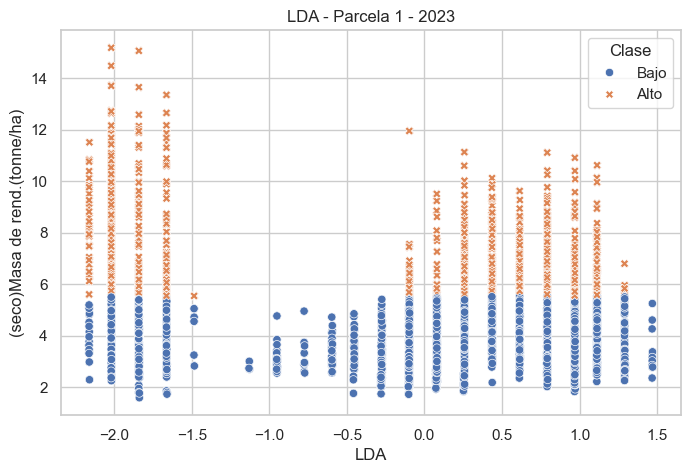

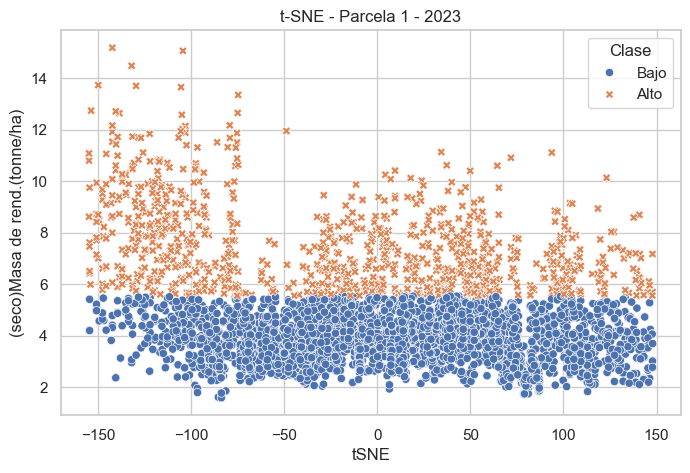

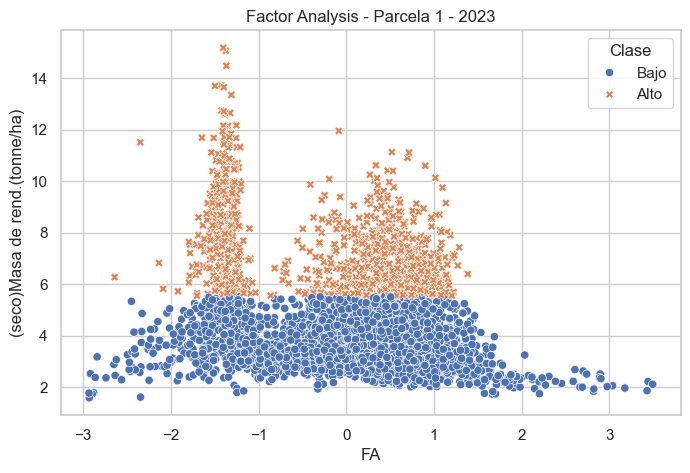

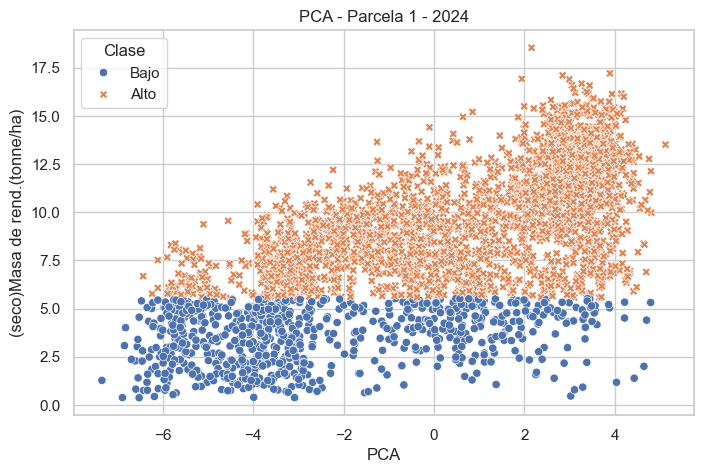

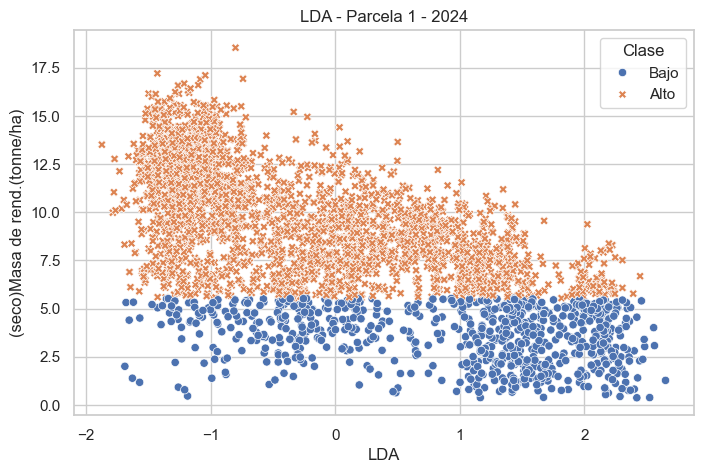

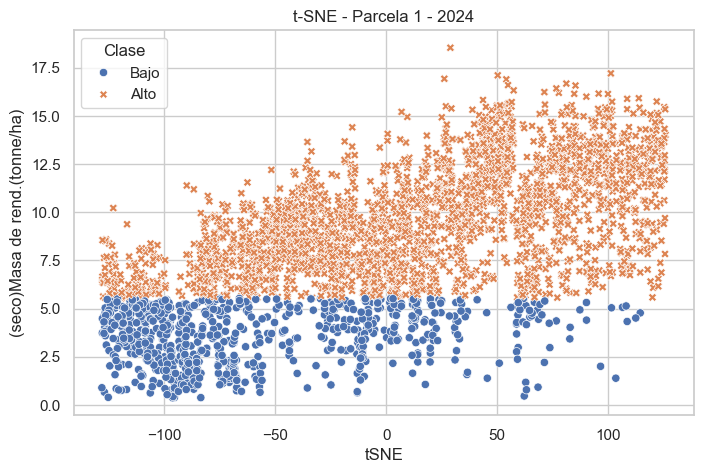

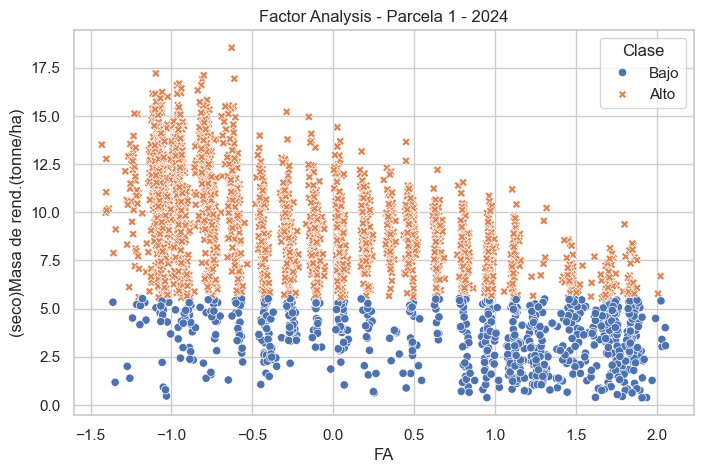

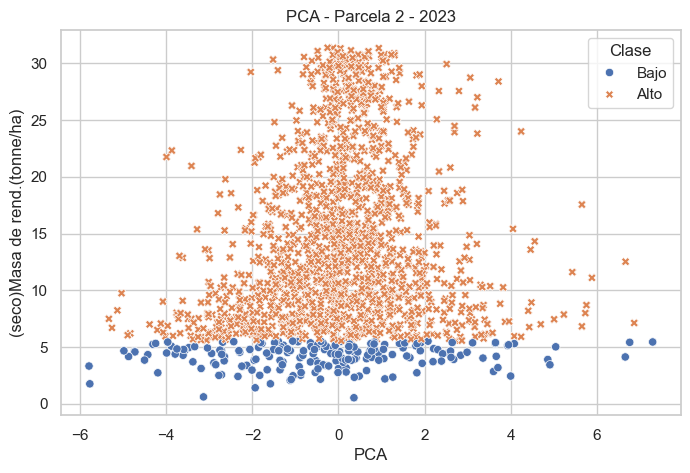

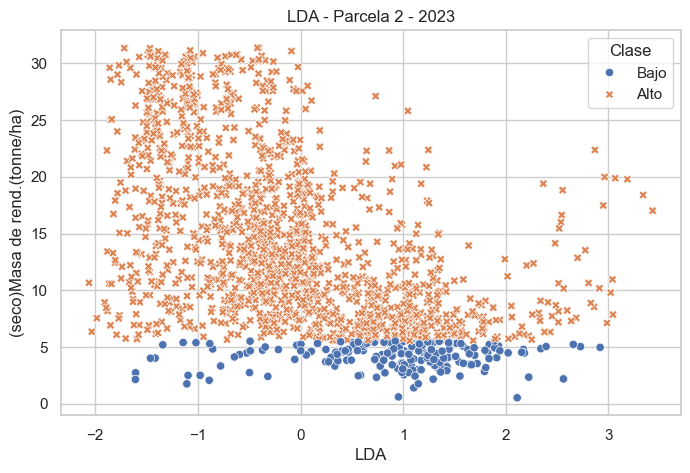

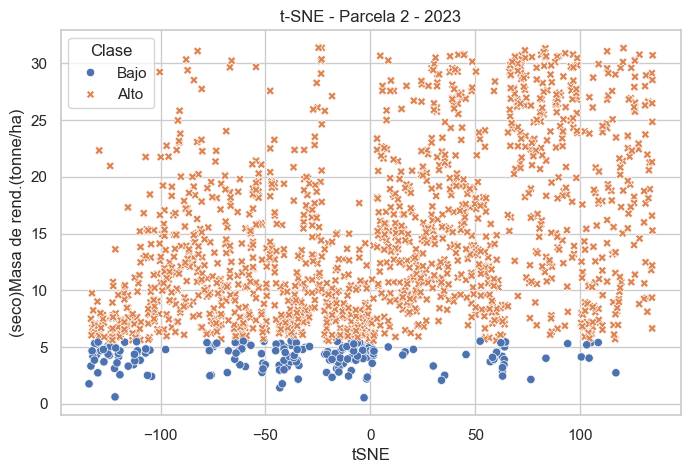

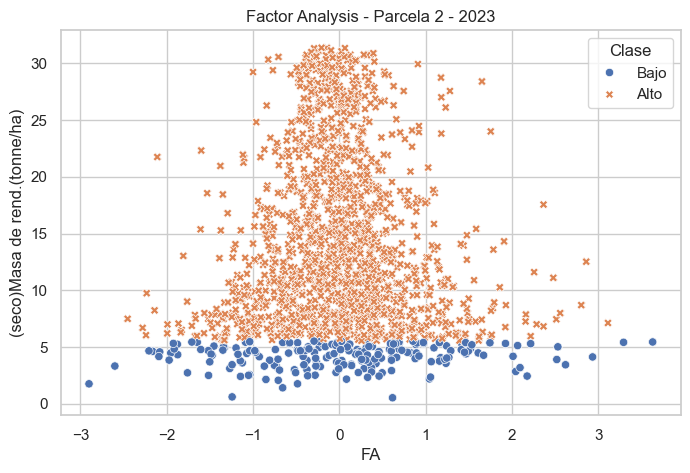

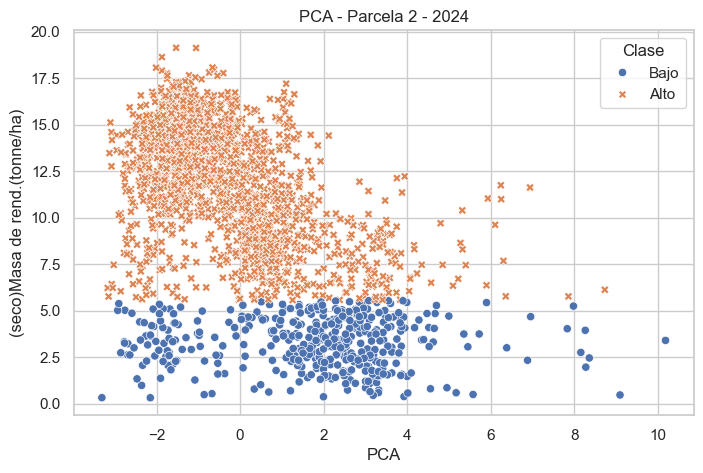

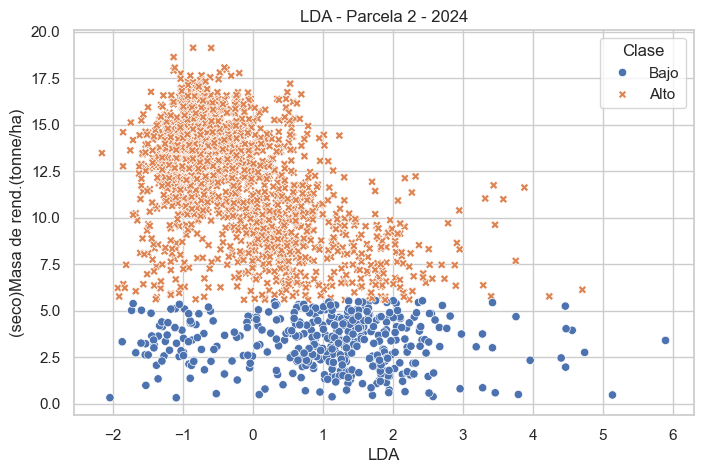

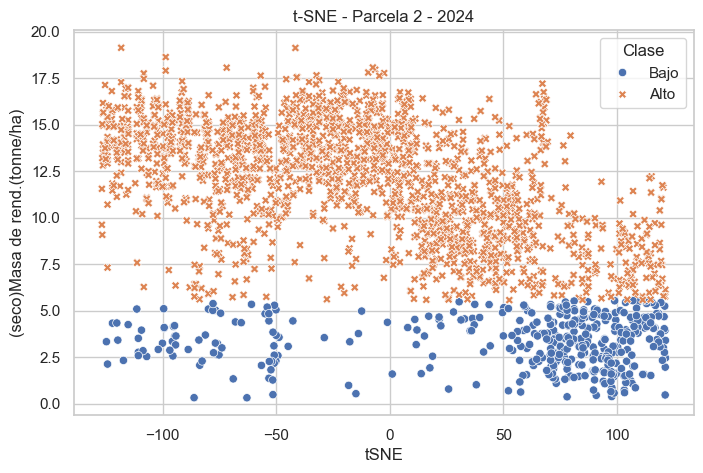

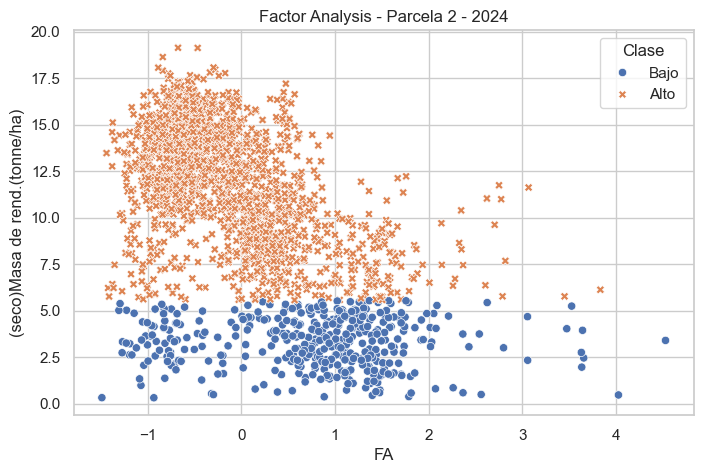

In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE

# Lista de archivos
archivos = [
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 1\1. Cosecha 2023.csv",
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 1\4. Cosecha 2024.csv",
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 2\1. Cosecha 2023.csv",
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 2\4. Cosecha 2024.csv"
]

df_list = []
for archivo in archivos:
    df_temp = pd.read_csv(archivo, encoding='latin-1')
    parcela = os.path.basename(os.path.dirname(archivo))
    df_temp['Parcela'] = parcela
    df_list.append(df_temp)

df = pd.concat(df_list, ignore_index=True)

# Convertir fecha y extraer año
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df['Año'] = df['Fecha'].dt.year

# Variables y target
variables = ["Temp. grano(°C)", "Humedad(%)"]
target = "(seco)Masa de rend.(tonne/ha)"

# Crear clases para LDA
df['Clase'] = pd.qcut(df[target], q=2, labels=["Bajo", "Alto"])

sns.set(style="whitegrid")

# Función para graficar
def graficar(df_plot, x_col, parcela, año, tecnica):
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=x_col, y=target, hue='Clase', style='Clase', data=df_plot)
    plt.title(f'{tecnica} - {parcela} - {año}')
    plt.xlabel(x_col)
    plt.ylabel(target)
    plt.show()

# Iterar por parcela y año
for parcela in df['Parcela'].unique():
    for año in df['Año'].unique():
        df_sub = df[(df['Parcela'] == parcela) & (df['Año'] == año)].copy()  # <-- usar copy()
        if df_sub.empty:
            continue

        X = df_sub[variables].values
        y = df_sub['Clase'].values

        # PCA
        pca = PCA(n_components=1)
        df_sub['PCA'] = pca.fit_transform(X)
        graficar(df_sub, 'PCA', parcela, año, 'PCA')

        # LDA
        lda = LDA(n_components=1)
        df_sub['LDA'] = lda.fit_transform(X, y)
        graficar(df_sub, 'LDA', parcela, año, 'LDA')

        # t-SNE
        tsne = TSNE(n_components=1, random_state=42, learning_rate='auto')
        df_sub['tSNE'] = tsne.fit_transform(X)
        graficar(df_sub, 'tSNE', parcela, año, 't-SNE')

        # Factor Analysis
        fa = FactorAnalysis(n_components=1, random_state=42)
        df_sub['FA'] = fa.fit_transform(X)
        graficar(df_sub, 'FA', parcela, año, 'Factor Analysis')



Distribución de datos por cluster:
Cluster_produccion
Bajo          5021
Medio-Alto    5019
Alto          5019
Medio-Bajo    5018
Name: count, dtype: int64

Estadísticas descriptivas por cluster de producción:
                   Temp. grano(°C)                                            \
                             count       mean       std    min    25%    50%   
Cluster_produccion                                                             
Bajo                        5021.0  28.816401  2.675877  21.55  26.85  28.85   
Medio-Bajo                  5018.0  28.752053  2.808616  21.55  27.35  28.35   
Medio-Alto                  5019.0  28.508279  3.330496  21.55  26.45  27.85   
Alto                        5019.0  26.878791  3.232817  22.05  24.45  25.95   

                                 Humedad(%)             ...                 \
                      75%    max      count       mean  ...     75%    max   
Cluster_produccion                                      ...             

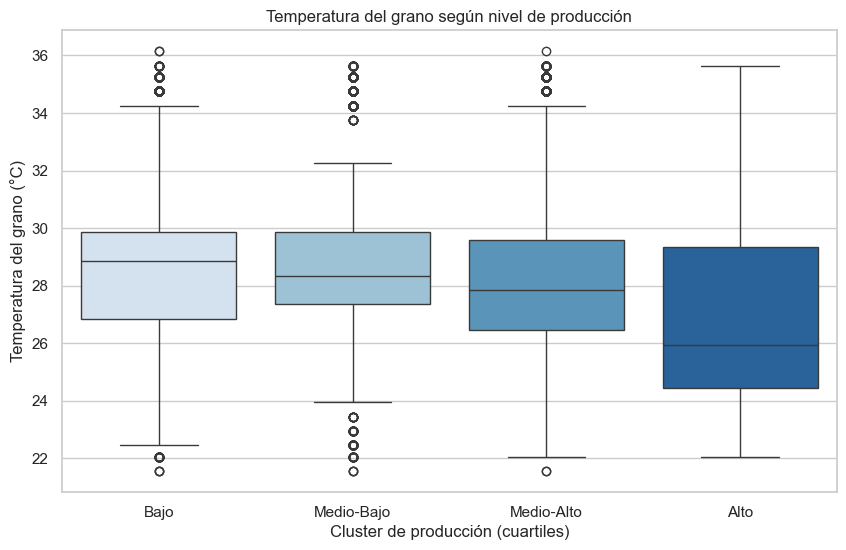

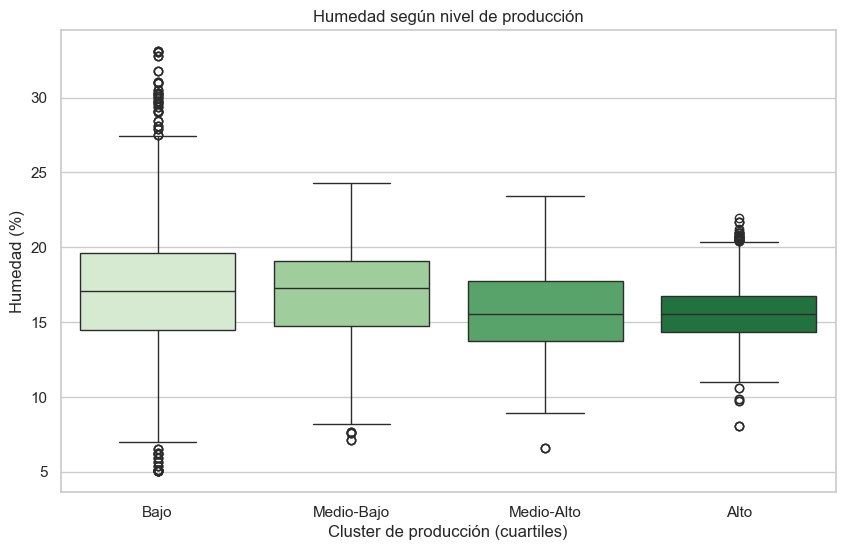

In [18]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# Cargar y unir los archivos
# -------------------------
archivos = [
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 1\1. Cosecha 2023.csv",
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 1\4. Cosecha 2024.csv",
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 2\1. Cosecha 2023.csv",
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 2\4. Cosecha 2024.csv"
]

df_list = []
for archivo in archivos:
    df_temp = pd.read_csv(archivo, encoding='latin-1')
    parcela = os.path.basename(os.path.dirname(archivo))
    df_temp['Parcela'] = parcela
    df_list.append(df_temp)

df = pd.concat(df_list, ignore_index=True)

# Convertir fecha y extraer año
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df['Año'] = df['Fecha'].dt.year

# Variables de interés
variables = ["Temp. grano(°C)", "Humedad(%)", "(seco)Masa de rend.(tonne/ha)"]

# ----------------------------------
# Crear clusters por cuartiles (25%)
# ----------------------------------
df = df.dropna(subset=["(seco)Masa de rend.(tonne/ha)"])  # eliminar NaN en la variable objetivo

# Crear una nueva columna de cuartil
df["Cluster_produccion"] = pd.qcut(
    df["(seco)Masa de rend.(tonne/ha)"],
    q=4,
    labels=["Bajo", "Medio-Bajo", "Medio-Alto", "Alto"]
)

# Revisar cómo se distribuyen los datos
print("\nDistribución de datos por cluster:")
print(df["Cluster_produccion"].value_counts())

# -------------------------
# Estadísticas por cluster
# -------------------------
cluster_stats = df.groupby("Cluster_produccion", observed = False)[["Temp. grano(°C)", "Humedad(%)", "(seco)Masa de rend.(tonne/ha)"]].describe()
print("\nEstadísticas descriptivas por cluster de producción:")
print(cluster_stats)

# -------------------------
# Visualización comparativa
# -------------------------
sns.set_theme(style="whitegrid")

# Temperatura vs Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="Cluster_produccion",
    y="Temp. grano(°C)",
    hue="Cluster_produccion",   # usar hue=x para evitar warning
    data=df,
    palette="Blues",
    legend=False
)
plt.title("Temperatura del grano según nivel de producción")
plt.xlabel("Cluster de producción (cuartiles)")
plt.ylabel("Temperatura del grano (°C)")
plt.legend([], [], frameon=False)
plt.show()

# Humedad vs Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="Cluster_produccion",
    y="Humedad(%)",
    hue="Cluster_produccion",   # usar hue=x para evitar warning
    data=df,
    palette="Greens",
    legend=False
)
plt.title("Humedad según nivel de producción")
plt.xlabel("Cluster de producción (cuartiles)")
plt.ylabel("Humedad (%)")
plt.legend([], [], frameon=False)
plt.show()


Estadísticas descriptivas por cluster, parcela y año:
                                  Temp. grano(°C)                              \
                                            count       mean       std    min   
Parcela   Año  Cluster_produccion                                               
Parcela 1 2023 Bajo                        2799.0  29.358896  2.408290  25.45   
               Medio-Bajo                  2799.0  29.004234  2.368547  25.95   
               Medio-Alto                  2793.0  29.307573  2.753719  25.45   
               Alto                        2796.0  30.627468  3.553499  25.95   
          2024 Bajo                         817.0  25.551958  3.002596  21.55   
               Medio-Bajo                   817.0  27.275214  2.720560  21.55   
               Medio-Alto                   820.0  28.510244  2.101498  22.05   
               Alto                         814.0  30.354668  1.147789  24.45   
Parcela 2 2023 Bajo                         852.0  26.

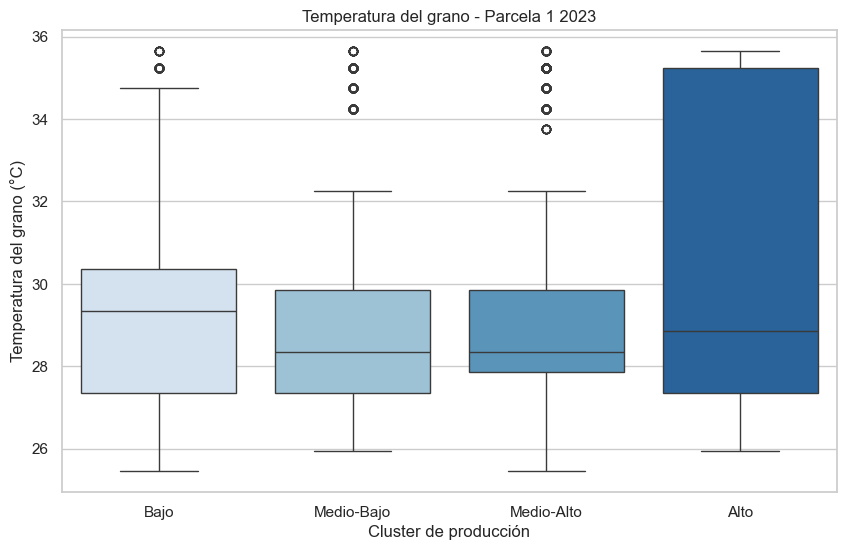

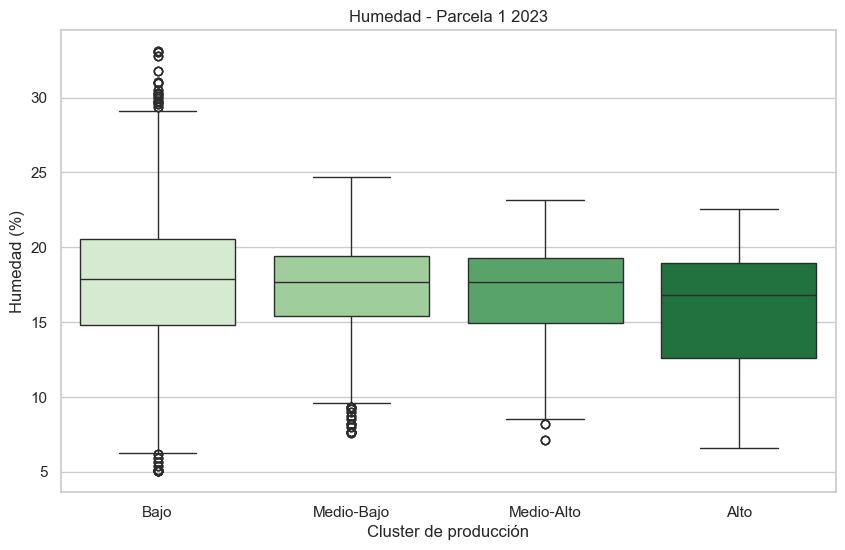

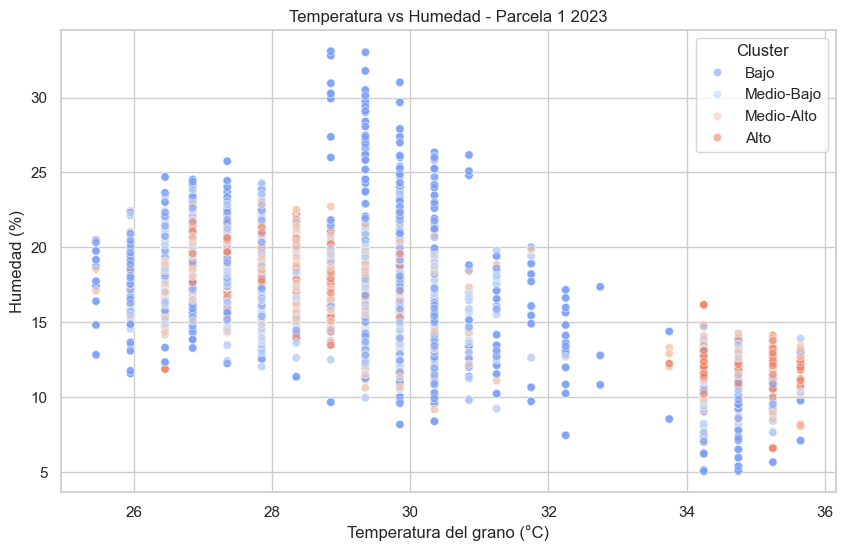

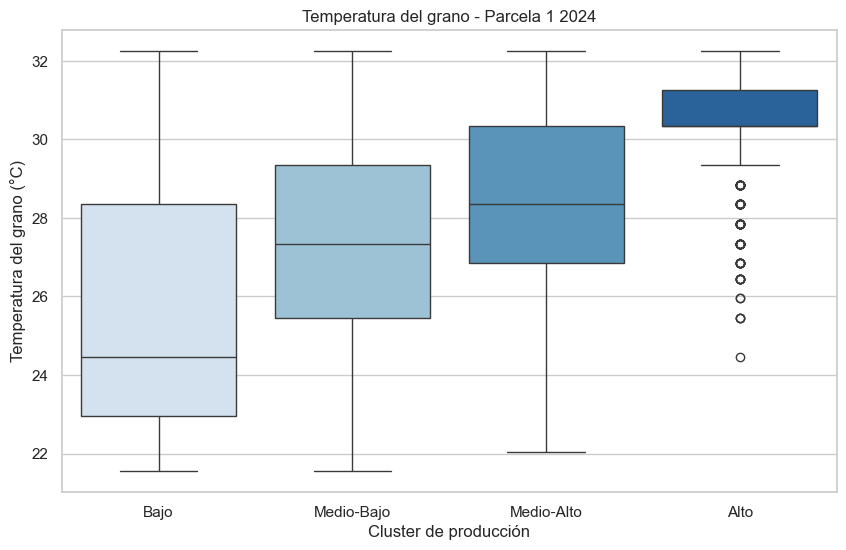

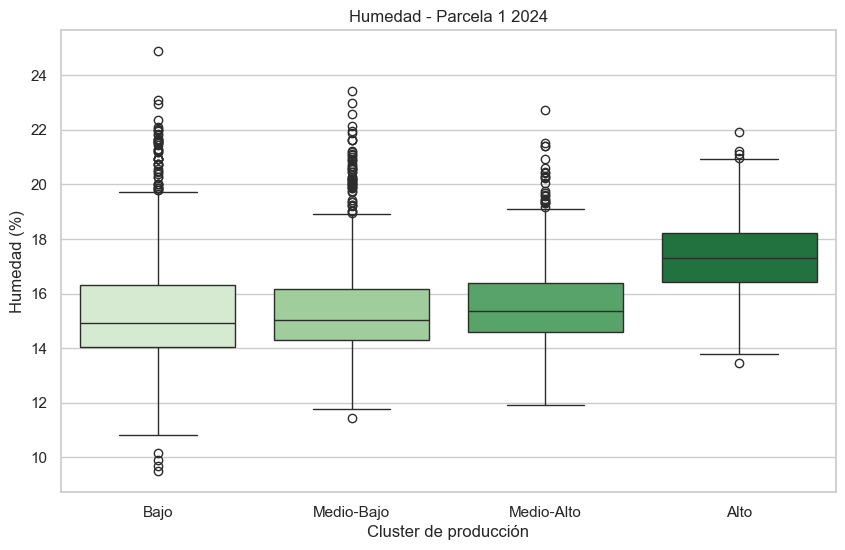

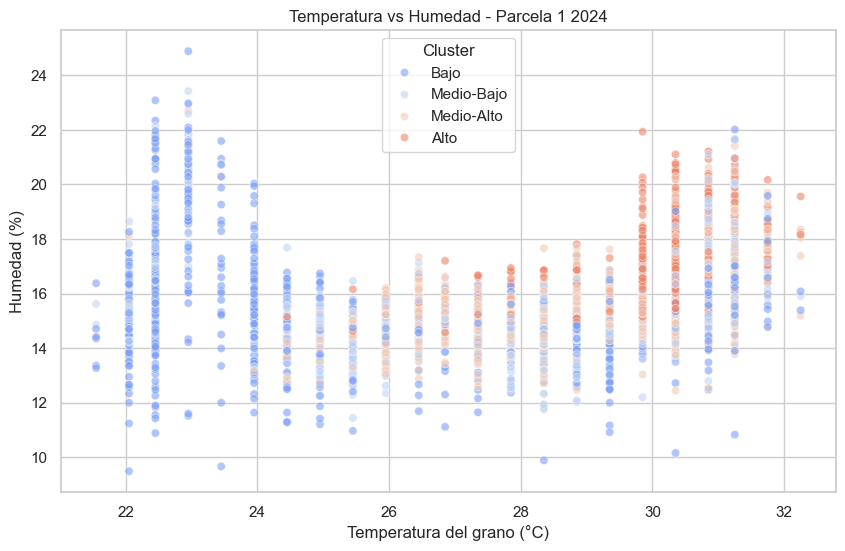

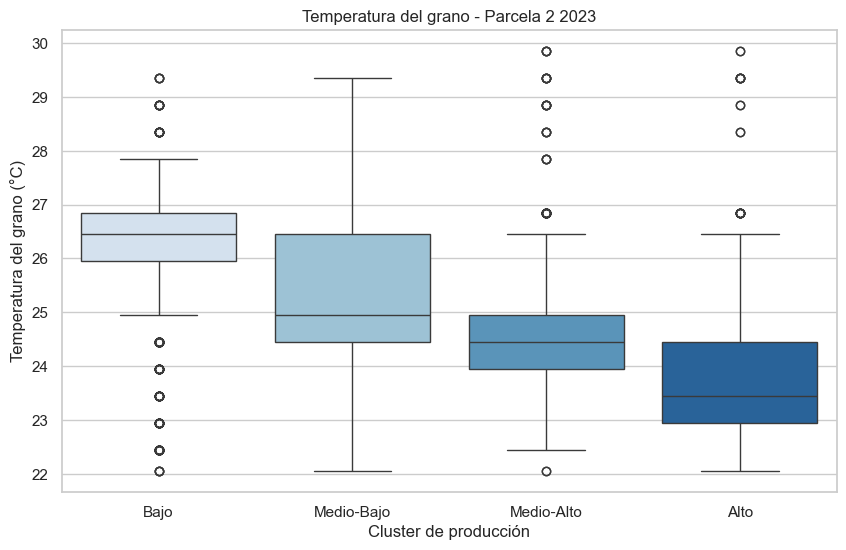

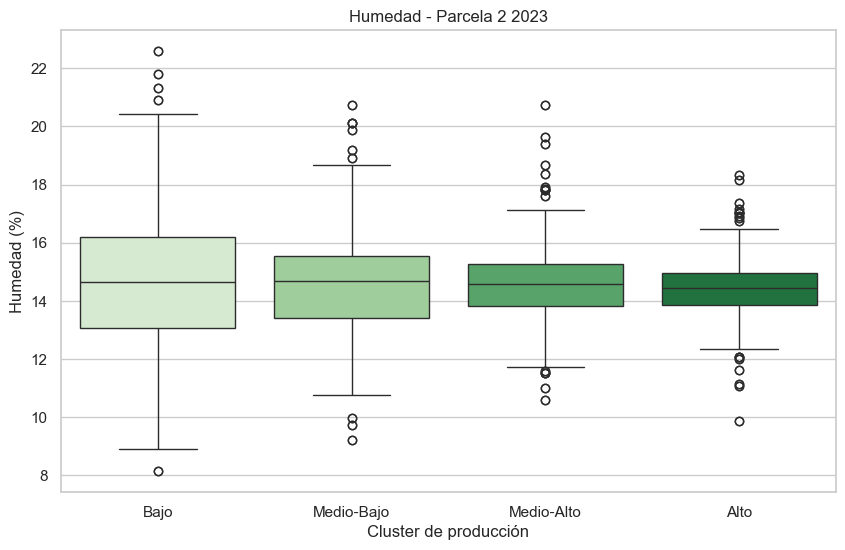

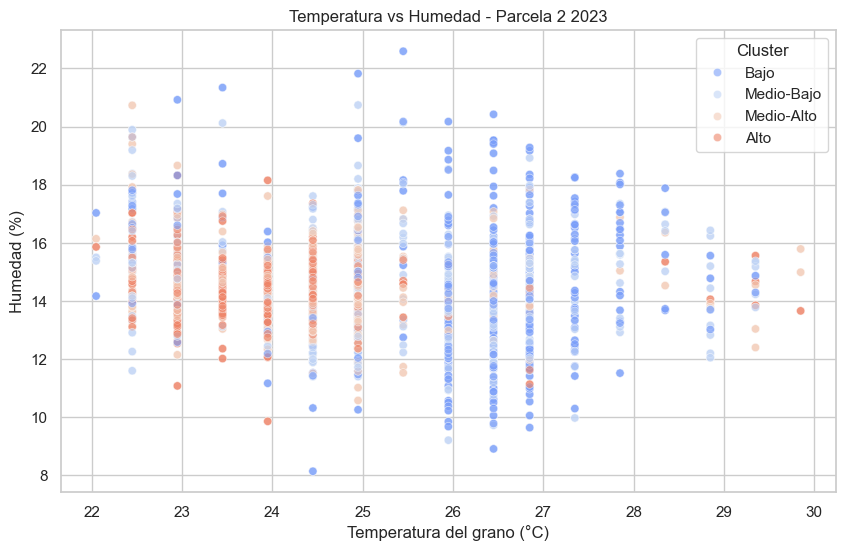

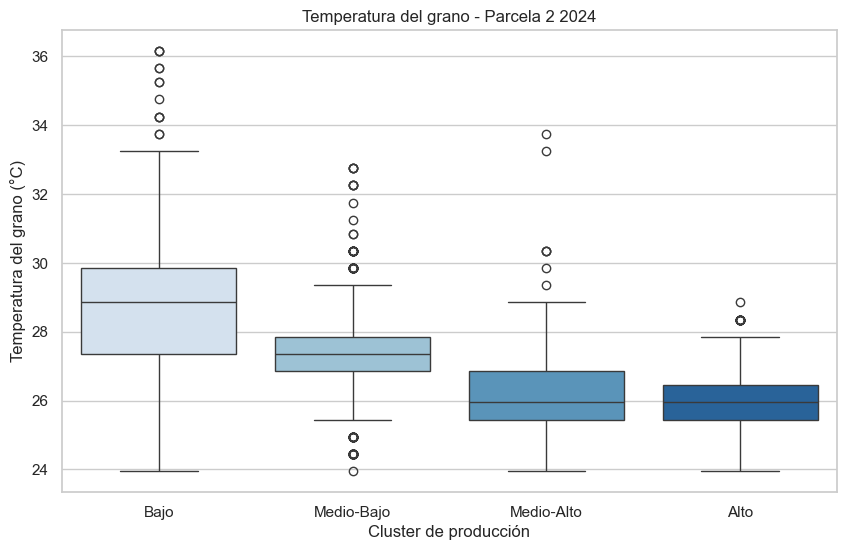

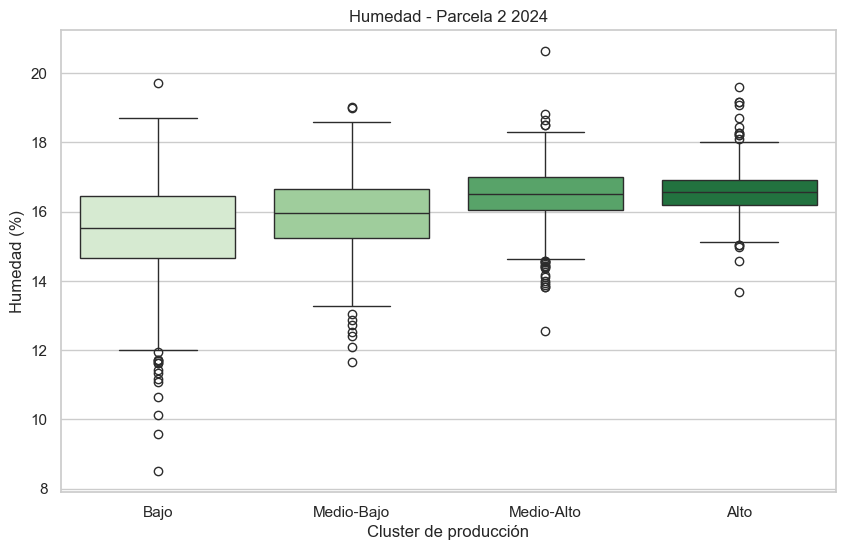

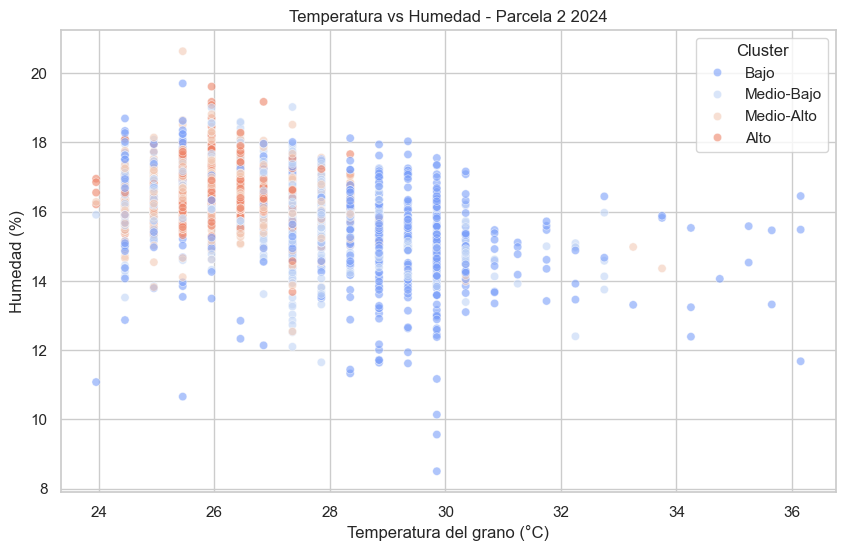

In [20]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# Cargar y unir los archivos
# -------------------------
archivos = [
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 1\1. Cosecha 2023.csv",
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 1\4. Cosecha 2024.csv",
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 2\1. Cosecha 2023.csv",
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 2\4. Cosecha 2024.csv"
]

df_list = []
for archivo in archivos:
    df_temp = pd.read_csv(archivo, encoding='latin-1')
    parcela = os.path.basename(os.path.dirname(archivo))
    df_temp['Parcela'] = parcela
    df_list.append(df_temp)

df = pd.concat(df_list, ignore_index=True)

# Convertir fecha y extraer año
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df['Año'] = df['Fecha'].dt.year

# Variables de interés
variables = ["Temp. grano(°C)", "Humedad(%)", "(seco)Masa de rend.(tonne/ha)"]

# -------------------------
# Crear clusters por parcela y año
# -------------------------
df = df.dropna(subset=["(seco)Masa de rend.(tonne/ha)"])  # eliminar NaN en la variable objetivo

df["Cluster_produccion"] = df.groupby(["Parcela", "Año"])["(seco)Masa de rend.(tonne/ha)"] \
    .transform(lambda x: pd.qcut(x, q=4, labels=["Bajo", "Medio-Bajo", "Medio-Alto", "Alto"]))

# -------------------------
# Estadísticas por cluster, parcela y año
# -------------------------
cluster_stats = df.groupby(["Parcela", "Año", "Cluster_produccion"], observed=False)[
    ["Temp. grano(°C)", "Humedad(%)", "(seco)Masa de rend.(tonne/ha)"]
].describe()

print("\nEstadísticas descriptivas por cluster, parcela y año:")
print(cluster_stats)

# -------------------------
# Visualización comparativa
# -------------------------
sns.set(style="whitegrid")
parcelas = df['Parcela'].unique()
años = df['Año'].unique()

for parcela in parcelas:
    for año in años:
        df_subset = df[(df['Parcela'] == parcela) & (df['Año'] == año)]

        if df_subset.empty:
            continue

        # Boxplot Temperatura
        plt.figure(figsize=(10,6))
        sns.boxplot(
            x="Cluster_produccion",
            y="Temp. grano(°C)",
            hue="Cluster_produccion",
            data=df_subset,
            palette="Blues",
            legend=False
        )
        plt.title(f"Temperatura del grano - {parcela} {año}")
        plt.xlabel("Cluster de producción")
        plt.ylabel("Temperatura del grano (°C)")
        plt.show()

        # Boxplot Humedad
        plt.figure(figsize=(10,6))
        sns.boxplot(
            x="Cluster_produccion",
            y="Humedad(%)",
            hue="Cluster_produccion",
            data=df_subset,
            palette="Greens",
            legend=False
        )
        plt.title(f"Humedad - {parcela} {año}")
        plt.xlabel("Cluster de producción")
        plt.ylabel("Humedad (%)")
        plt.show()

        # Scatterplot Temperatura vs Humedad
        plt.figure(figsize=(10,6))
        sns.scatterplot(
            x="Temp. grano(°C)",
            y="Humedad(%)",
            hue="Cluster_produccion",
            data=df_subset,
            palette="coolwarm",
            alpha=0.6
        )
        plt.title(f"Temperatura vs Humedad - {parcela} {año}")
        plt.xlabel("Temperatura del grano (°C)")
        plt.ylabel("Humedad (%)")
        plt.legend(title="Cluster")
        plt.show()


Estadísticas de WetBulb:
count    20077.000000
mean        13.636315
std          1.912255
min          8.007297
25%         12.329789
50%         13.793984
75%         14.901096
max         18.865009
Name: WetBulb(°C), dtype: float64

Estadísticas del target:
count    20077.000000
mean         7.413684
std          5.246853
min          0.321000
25%          3.820000
50%          5.541000
75%          9.555000
max         31.360000
Name: (seco)Masa de rend.(tonne/ha), dtype: float64


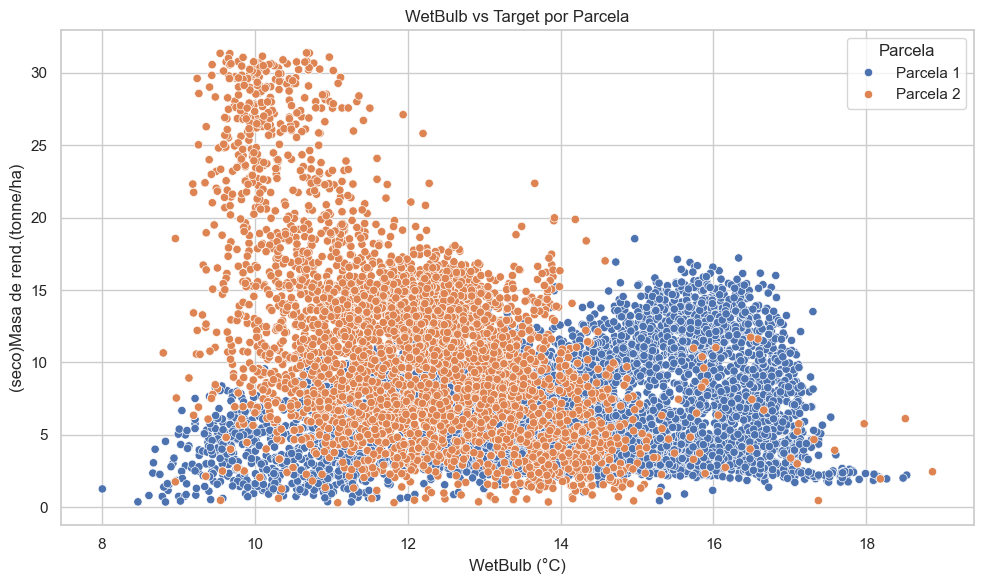

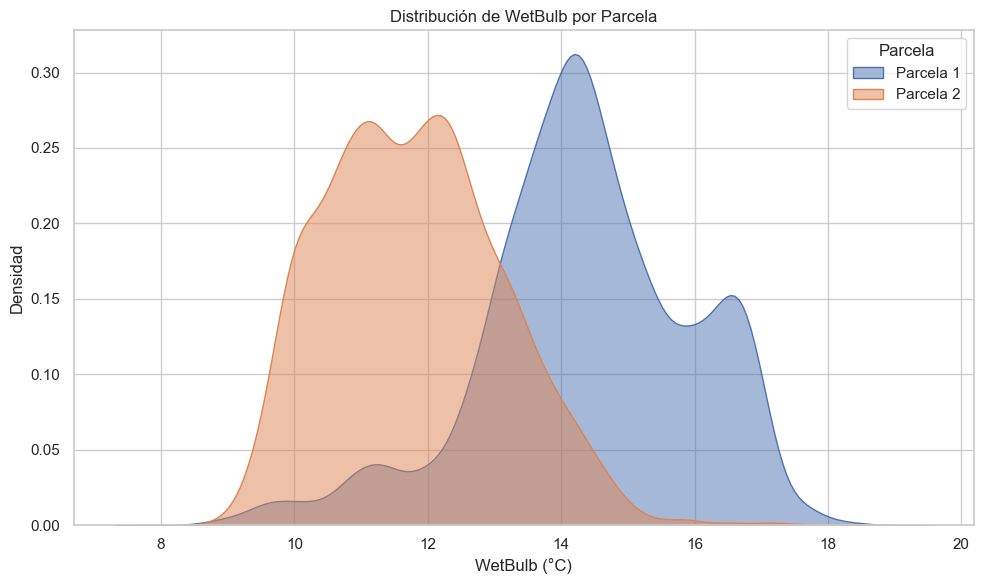

In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# Archivos
# ----------------------------
archivos = [
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 1\1. Cosecha 2023.csv",
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 1\4. Cosecha 2024.csv",
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 2\1. Cosecha 2023.csv",
    r"INFORMACIÓN DE LAS PARCELAS\Parcela 2\4. Cosecha 2024.csv"
]

df_list = []
for archivo in archivos:
    df_temp = pd.read_csv(archivo, encoding='latin-1')
    parcela = os.path.basename(os.path.dirname(archivo))
    df_temp['Parcela'] = parcela
    df_list.append(df_temp)

df = pd.concat(df_list, ignore_index=True)

# Convertir fecha y extraer año
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df['Año'] = df['Fecha'].dt.year

# Variables
temp_col = "Temp. grano(°C)"
hum_col = "Humedad(%)"
target = "(seco)Masa de rend.(tonne/ha)"

# ----------------------------
# Calcular Wet Bulb (aproximación segura)
# ----------------------------
def wet_bulb_approx(T, RH):
    return T * np.arctan(0.151977 * np.sqrt(RH + 8.313659)) + \
           np.arctan(T + RH) - \
           np.arctan(RH - 1.676331) + \
           0.00391838 * RH**1.5 * np.arctan(0.023101 * RH) - 4.686035

df['WetBulb(°C)'] = wet_bulb_approx(df[temp_col], df[hum_col])

# ----------------------------
# Limpiar datos
# ----------------------------
df_clean = df.dropna(subset=[temp_col, hum_col, 'WetBulb(°C)', target]).copy()

# ----------------------------
# Estadísticas descriptivas
# ----------------------------
print("Estadísticas de WetBulb:")
print(df_clean['WetBulb(°C)'].describe())

print("\nEstadísticas del target:")
print(df_clean[target].describe())

# ----------------------------
# Gráfica: WetBulb vs Target
# ----------------------------
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WetBulb(°C)', y=target, hue='Parcela', data=df_clean)
plt.title('WetBulb vs Target por Parcela')
plt.xlabel('WetBulb (°C)')
plt.ylabel(target)
plt.legend(title='Parcela')
plt.tight_layout()
plt.show()

# ----------------------------
# Opcional: KDE de WetBulb por parcela
# ----------------------------
plt.figure(figsize=(10, 6))
parcelas = df_clean['Parcela'].unique()
for parcela in parcelas:
    sns.kdeplot(df_clean[df_clean['Parcela'] == parcela]['WetBulb(°C)'], fill=True, label=parcela, alpha=0.5)
plt.title('Distribución de WetBulb por Parcela')
plt.xlabel('WetBulb (°C)')
plt.ylabel('Densidad')
plt.legend(title='Parcela')
plt.tight_layout()
plt.show()
